# Data Mining ACW - Risk Classification

### Imports

Libraries are imported here, key libraries include Pandas for data frames and seaborn for visualisation

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning

##### Import data

In [2]:
MedicalRecords = pd.read_csv("600092_data.csv").copy() # Importing csv
MedicalRecordsWorkingCopy = MedicalRecords.copy()

MedicalRecordsWorkingCopy.head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


##### Check for Null Values

Null values are dropped as the percentage of the data that they affect are very low and if this data is imputed it may affect the accuracy of the data models later on in the modeling stage. In this stage some inconsistencies with medical terms affected the data integrity so have been merged.

Find all values and compare against data description

In [3]:
print("Values of Random are:",MedicalRecordsWorkingCopy['Random'].unique(),"\n")
print("Values of Id are:",MedicalRecordsWorkingCopy['Id'].unique(),"\n")
print("Values of Indication are:",MedicalRecordsWorkingCopy['Indication'].unique(),"\n")
print("Values of IHD are:",MedicalRecordsWorkingCopy['IHD'].unique(),"\n")
print("Values of Arrhythmia are:",MedicalRecordsWorkingCopy['Arrhythmia'].unique(),"\n")
print("Values of History are:",MedicalRecordsWorkingCopy['History'].unique(),"\n")
print("Values of IPSI are:",MedicalRecordsWorkingCopy['IPSI'].unique(),"\n")
print("Values of Contra are:",MedicalRecordsWorkingCopy['Contra'].unique(),"\n")
print("Values of label are:",MedicalRecordsWorkingCopy['label'].unique(),"\n")

Values of Random are: [0.60243709 0.12815663 0.6768621  ... 0.62037252 0.63934177 0.6349223 ] 

Values of Id are: [218242 159284 106066 ... 101754 263836 254941] 

Values of Indication are: ['A-F' 'TIA' 'CVA' 'ASx' 'Asx' nan] 

Values of IHD are: ['no' 'yes'] 

Values of Arrhythmia are: ['no' 'yes'] 

Values of History are: ['no' 'yes' nan] 

Values of IPSI are: [78. 70. 95. 90. 75. 81. 80. 76. 82. 85. 68. 50. 73. 99. 71. 65. 74. 98.
 97. 60. 67. 79. 77. 84. 55. 35. 51. nan 69. 72.] 

Values of Contra are: ['20 ' '60 ' '40' '85' '95' '100' '50' '50 ' '30 ' '40 ' '80' '25 ' '75 '
 '10 ' '70 ' '15 ' '75' '35 ' '30' '80 ' '55 ' '100 ' '90' '85 ' '79'
 '45 ' '65 ' '90 ' '62' '53' '51 ' '70' '60' '35' '55' '16 ' '73 ' ' '
 '10' '20' '65'] 

Values of label are: ['NoRisk' 'Risk' 'Unknown' nan] 



In [4]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication'].isnull()] #3 Null Values in Indication

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
442,0.648122,261060,NaN,no,yes,yes,no,no,70.0,40,NoRisk
822,0.211760,205845,NaN,no,yes,no,no,no,80.0,100,Risk
1007,0.761219,256076,NaN,no,no,no,yes,yes,99.0,100,Risk


In [5]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Diabetes'].isnull()] #2 Null Values in Diabetes

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
447,0.681744,224257,CVA,NaN,yes,yes,yes,no,90.0,100,Risk
514,0.392130,210861,A-F,NaN,no,yes,no,no,80.0,40,NoRisk


In [6]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Hypertension'].isnull()] # 3 Null values in Hypertension

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.388790,240232,CVA,yes,no,NaN,yes,no,95.0,90,Risk
590,0.707950,289096,A-F,no,no,NaN,no,no,78.0,30,NoRisk
983,0.319215,158024,TIA,no,no,NaN,no,no,75.0,75,NoRisk


In [7]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['History'].isnull()] #2 Null Values in History

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
337,0.617072,260770,CVA,no,yes,no,no,NaN,85.0,50,NoRisk
784,0.243645,196483,CVA,no,no,yes,yes,NaN,95.0,100,Risk


In [8]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['IPSI'].isnull()] #4 Null values in ISPI

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
620,0.283872,227779,A-F,no,no,no,no,no,NaN,100,Risk
752,0.243518,146415,CVA,no,yes,yes,yes,no,NaN,100,Risk
845,0.920096,104176,CVA,no,no,no,no,no,NaN,20,NoRisk
916,0.004501,281679,A-F,no,no,no,no,no,NaN,50,NoRisk


In [9]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label'].isnull()] #3 Null Values in Label

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
812,0.756938,190671,CVA,no,yes,yes,no,no,76.0,50,NaN
974,0.923418,165432,CVA,no,yes,yes,yes,no,80.0,70,NaN
1418,0.813102,169726,TIA,yes,no,no,no,yes,90.0,50,NaN


Find any Unknown Values as Unknown Values are Essentially the same as Null, the data description provided states there should only be Risk and NoRisk

In [10]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label']=="Unknown"] #2 Values Wrong

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
475,0.298074,173791,ASx,no,yes,yes,no,no,70.0,55,Unknown
523,0.460170,283846,CVA,no,no,yes,yes,no,95.0,100,Unknown


In [11]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Contra'] == " "] #1 Value Wrong

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
453,0.518558,254469,ASx,no,no,yes,no,no,70.0,,NoRisk


20/1520 Identified as Null/Unknown/Blank which is 1.3% of the whole dataset, this is very small dropping these values may be the best option as imputing them may cause the data to be less accurate later on

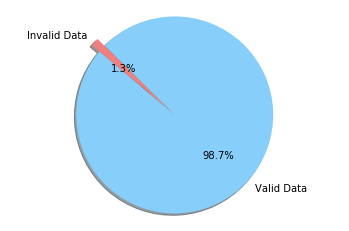

In [18]:
labels = 'Valid Data', 'Invalid Data'
sizes = [1500, 20]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### Drop the Records

In [16]:
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Indication"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Diabetes"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Hypertension"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["History"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["IPSI"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["label"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label'] == "Unknown"].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Contra'] == " "].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy


,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


#### Data Duplication

There are 2 Versions of ASx one with less records and 1 with more

In [17]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="Asx"]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
68,0.549947,113727,Asx,yes,yes,yes,no,no,75.0,100,Risk
111,0.171185,95883,Asx,yes,yes,yes,yes,no,99.0,75,Risk
131,0.511954,95004,Asx,no,yes,yes,yes,no,75.0,100,Risk
172,0.209577,84632,Asx,yes,yes,yes,no,no,90.0,95,Risk
177,0.895377,230462,Asx,no,yes,yes,yes,no,80.0,53,Risk
187,0.543190,217945,Asx,no,yes,yes,yes,no,80.0,50,Risk
354,0.589502,172699,Asx,no,yes,yes,yes,no,80.0,53,Risk
395,0.231878,168159,Asx,yes,yes,yes,no,no,99.0,75,Risk
466,0.956634,171298,Asx,yes,yes,yes,no,no,75.0,100,Risk
735,0.166833,232893,Asx,no,yes,yes,yes,no,80.0,50,Risk


In [22]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="ASx"]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
16,0.065821,275149,ASx,no,yes,yes,yes,no,90.0,100,Risk
19,0.065821,101248,ASx,yes,no,yes,no,no,80.0,80,Risk
21,0.981939,217006,ASx,no,yes,no,no,no,80.0,75,NoRisk
22,0.890427,184827,ASx,no,no,yes,no,no,85.0,10,NoRisk
57,0.723126,254427,ASx,no,yes,no,no,no,76.0,50,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1499,0.766184,201116,ASx,no,yes,no,no,no,73.0,20,NoRisk
1504,0.919141,254302,ASx,no,no,no,no,no,80.0,20,NoRisk
1506,0.932107,225751,ASx,no,no,yes,no,no,80.0,65,Risk
1509,0.724805,277082,ASx,no,yes,yes,yes,no,80.0,53,Risk


According to the medical dictionary (https://medical-dictionary.thefreedictionary.com/Asx) the correct version of this acronym is Asx. 

Change ASx to Asx

In [47]:
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.replace('ASx','Asx')
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="Asx"]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
16,0.065821,275149,Asx,no,yes,yes,yes,no,90.0,100,Risk
19,0.065821,101248,Asx,yes,no,yes,no,no,80.0,80,Risk
21,0.981939,217006,Asx,no,yes,no,no,no,80.0,75,NoRisk
22,0.890427,184827,Asx,no,no,yes,no,no,85.0,10,NoRisk
57,0.723126,254427,Asx,no,yes,no,no,no,76.0,50,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1499,0.766184,201116,Asx,no,yes,no,no,no,73.0,20,NoRisk
1504,0.919141,254302,Asx,no,no,no,no,no,80.0,20,NoRisk
1506,0.932107,225751,Asx,no,no,yes,no,no,80.0,65,Risk
1509,0.724805,277082,Asx,no,yes,yes,yes,no,80.0,53,Risk


In [50]:
print ("Is Random truley unique to each record:",MedicalRecordsWorkingCopy['Random'].is_unique,"\n")
print ("Is Random Id unique to each record:",MedicalRecordsWorkingCopy['Id'].is_unique)

Is Random truley unique to each record: False 

Is Random Id unique to each record: True


The Data dictionary states that Random is a completly unique value and as seen above the data repeats itself however Id is completley unique. Is the data wrong or the values value names in the wrong order? 

it is highly probable that the value names are the wrong way round and as you can see by the bar chart below you can see how many times a patient visited a hospital if "Random" was "ID". This should have been ironed out in the buiness understanding phase of CRISP-DM however due to not having any contact with the outside buiness I have kept this the same as the Data Description.

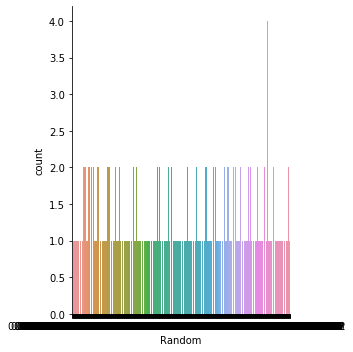

In [46]:
sns.catplot("Random",data = MedicalRecordsWorkingCopy, kind = 'count')

#### Droping Duplicates

Dropping the duplicates (patients that visited more than once) would drop a significant portion of the data (as seen below) so the datasets accuracy might be severly affected later on in the process. Additionally, considering im only predicting if a Patient is a Risk or not I don't mind having duplicates in my data as this will not affect my end result. 

Number of duplicated records 289


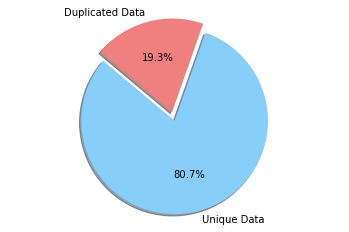

In [57]:
count = 0
DuplicatedNo = MedicalRecordsWorkingCopy['Random'].duplicated()
for x in DuplicatedNo:
    if x == True:
        count = count + 1
        
print("Number of duplicated records",count)


labels = 'Unique Data', 'Duplicated Data'
sizes = [1211, 289]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

##### Check if data is clean

This data should align with the given data description

In [28]:
print("Values of Random are:",MedicalRecordsWorkingCopy['Random'].unique(),"\n")
print("Values of Id are:",MedicalRecordsWorkingCopy['Id'].unique(),"\n")
print("Values of Indication are:",MedicalRecordsWorkingCopy['Indication'].unique(),"\n")
print("Values of IHD are:",MedicalRecordsWorkingCopy['IHD'].unique(),"\n")
print("Values of Arrhythmia are:",MedicalRecordsWorkingCopy['Arrhythmia'].unique(),"\n")
print("Values of History are:",MedicalRecordsWorkingCopy['History'].unique(),"\n")
print("Values of IPSI are:",MedicalRecordsWorkingCopy['IPSI'].unique(),"\n")
print("Values of Contra are:",MedicalRecordsWorkingCopy['Contra'].unique(),"\n")
print("Values of label are:",MedicalRecordsWorkingCopy['label'].unique(),"\n")

Values of Random are: [0.60243709 0.12815663 0.6768621  ... 0.62037252 0.63934177 0.6349223 ] 

Values of Id are: [218242 159284 106066 ... 101754 263836 254941] 

Values of Indication are: ['A-F' 'TIA' 'CVA' 'Asx'] 

Values of IHD are: ['no' 'yes'] 

Values of Arrhythmia are: ['no' 'yes'] 

Values of History are: ['no' 'yes'] 

Values of IPSI are: [78. 70. 95. 90. 75. 81. 80. 76. 82. 85. 68. 50. 73. 99. 71. 65. 74. 98.
 97. 60. 67. 79. 77. 84. 55. 35. 51. 69. 72.] 

Values of Contra are: ['20 ' '60 ' '40' '85' '95' '100' '50' '50 ' '30 ' '40 ' '80' '25 ' '75 '
 '10 ' '70 ' '15 ' '75' '35 ' '30' '80 ' '55 ' '100 ' '90' '85 ' '79'
 '45 ' '65 ' '90 ' '62' '53' '51 ' '70' '60' '35' '55' '16 ' '73 ' '10'
 '65'] 

Values of label are: ['NoRisk' 'Risk'] 

